In [1]:
# Install packages
# Uncomment if first time
#%pip install pandas
#%pip install scikit-learn

#%pip install seaborn
#%pip install matplotlib

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# 1. Exploratory Data Analysis (EDA)

### Import Iris Dataset

From sklearn

In [3]:
# Load the Iris dataset from sklearn datasets
iris = datasets.load_iris()

### Explore Iris Dataset

```
Iris dataset is a 'bunch'

Allows use of all dict class features

Access by dot(.) notation
    e.g., iris.feature_names
    Not possible in a normal dict
```

In [4]:
# Determine type of dataset
type(iris)

sklearn.utils._bunch.Bunch

In [5]:
# Explore the dataset
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

##### Determine the shape of the data

In [6]:
# A description of the dataset can be seen as provided in dataset
# Several bits of information are given here
# Not all datasets provide this information
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
# Print the shape of feature array
iris.data.shape

# Output: 150 rows, 4 columns
# rows: 150 samples
#       
# columns: 4 features
#           petal length
#           petal width
#           sepal length
#           sepal width

(150, 4)

In [8]:
# Print the target class data
print("Target variables: ", iris.target)

# Find target class names
# using the encoding in 'target_names'
print("Target names encoding: ", iris.target_names)

# Output:
#       0 = Setsosa
#       1 = Versicolour
#       2 = Virginica

Target variables:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target names encoding:  ['setosa' 'versicolor' 'virginica']


In [9]:
# Print iris data values
# print("Iris values: ", iris.data)

# Print the feature names
print("Iris feature names: ", iris.feature_names)

# Print the target name
# This is the class label we want to predict
print("Iris target names: ", iris.target_names)

Iris feature names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris target names:  ['setosa' 'versicolor' 'virginica']


##### Determine array types

```
Data and target are of NumPy arrays
```

In [10]:
# Determine type of arrays in dataset
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

##### Convert to a Pandas DataFrame
```
To do some initial data exploratory analysis
```

In [11]:
# Convert to a pandas DataFrame
# Values: data
# Feature names: columns
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target variable to the DataFrame
# This is the class label we want to predict
df['target'] = iris.target

# Print the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Print the last few rows of the DataFrame
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [13]:
# Return a summary of the DataFrame
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### EDA using Visualisations

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

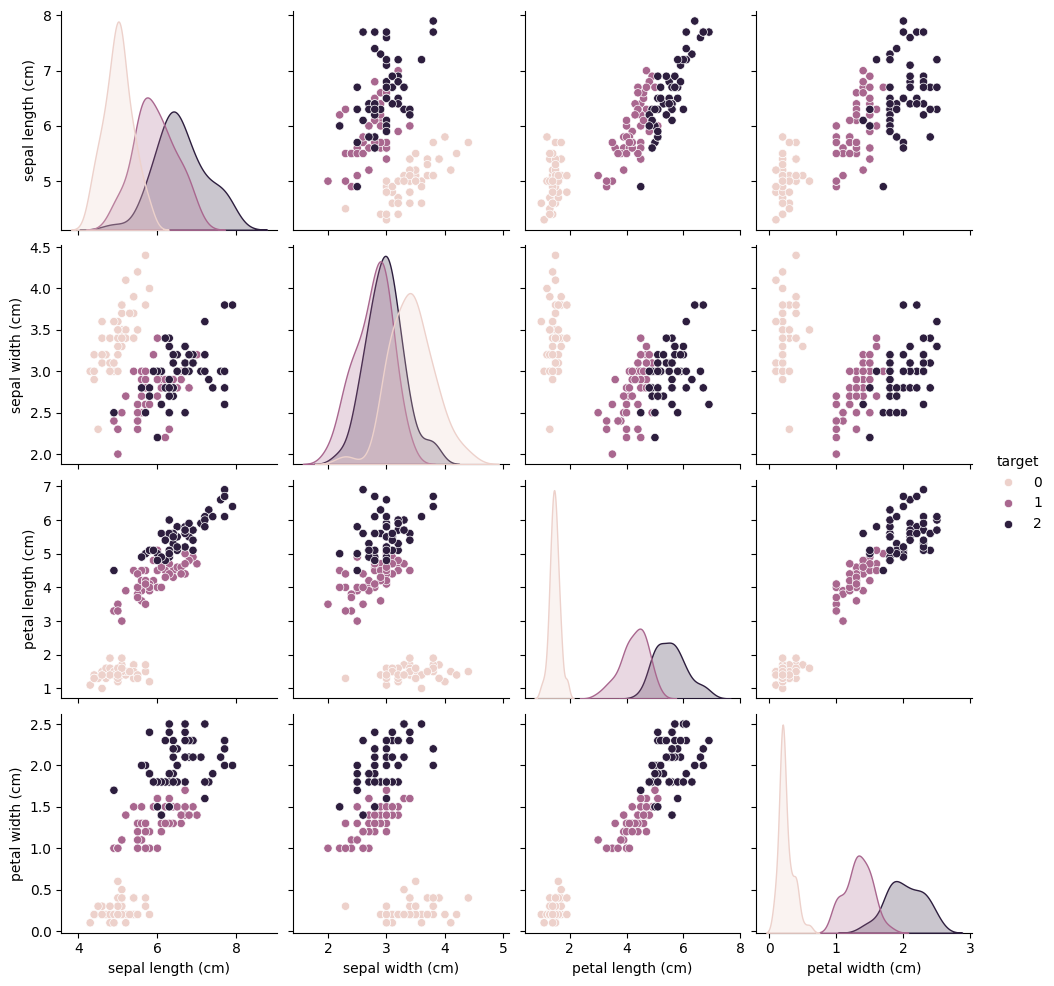

In [15]:
# Create a pairplot
sns.pairplot(df, hue='target')

# Show the plot
plt.show()

##### Applying a Custom Visualisation Changes

In [16]:
# Make a copy of the dataframe to preserve original
# df.copy() must be used
# would not copy if 'species_df = df' was used instead
#   This is because 'species_df = df' would be using the same object as df
species_df = df.copy()

# Rename the 'target' column to 'species'
# inplace will apply to existing DataFrame (not a new one)
species_df.rename(columns={'target': 'species'}, inplace=True)

# Create a dictionary to map target values to species names
target_dict = {0: 'Setosa (0)', 1: 'Versicolour (1)', 2: 'Virginica (2)'}

# Create a new column 'Species' by mapping the 'target' column using the dictionary
species_df['species'] = species_df['species'].map(target_dict)

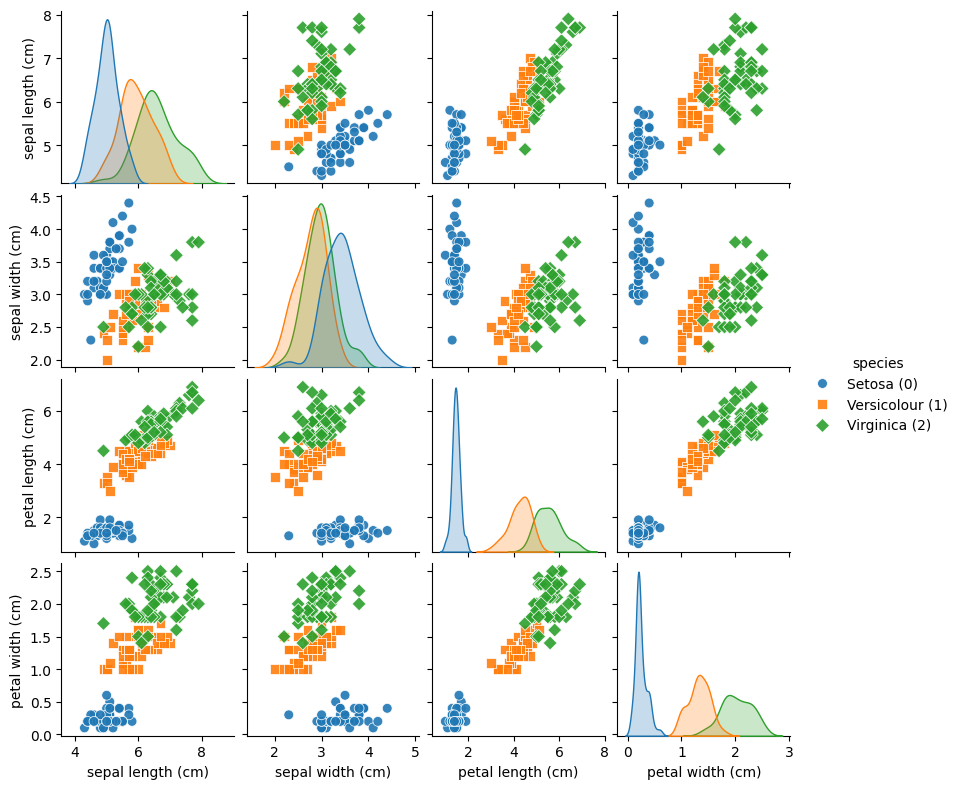

In [17]:
# Create a pairplot
# custom figure size,
# marker:
#   size(s),
#   shape(markers)
#   transparency(alpha)
sns.pairplot(species_df, 
             hue='species', 
             height=2.0, 
             plot_kws={"s": 50, "alpha": 0.9},  
             markers=["o", "s", "D"])

# Show the plot
plt.show()


# Output:
# 

# 2. Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
# loading csv data to dataframe 
housing = pd.read_csv('housing.csv')
# checking out the Data
housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


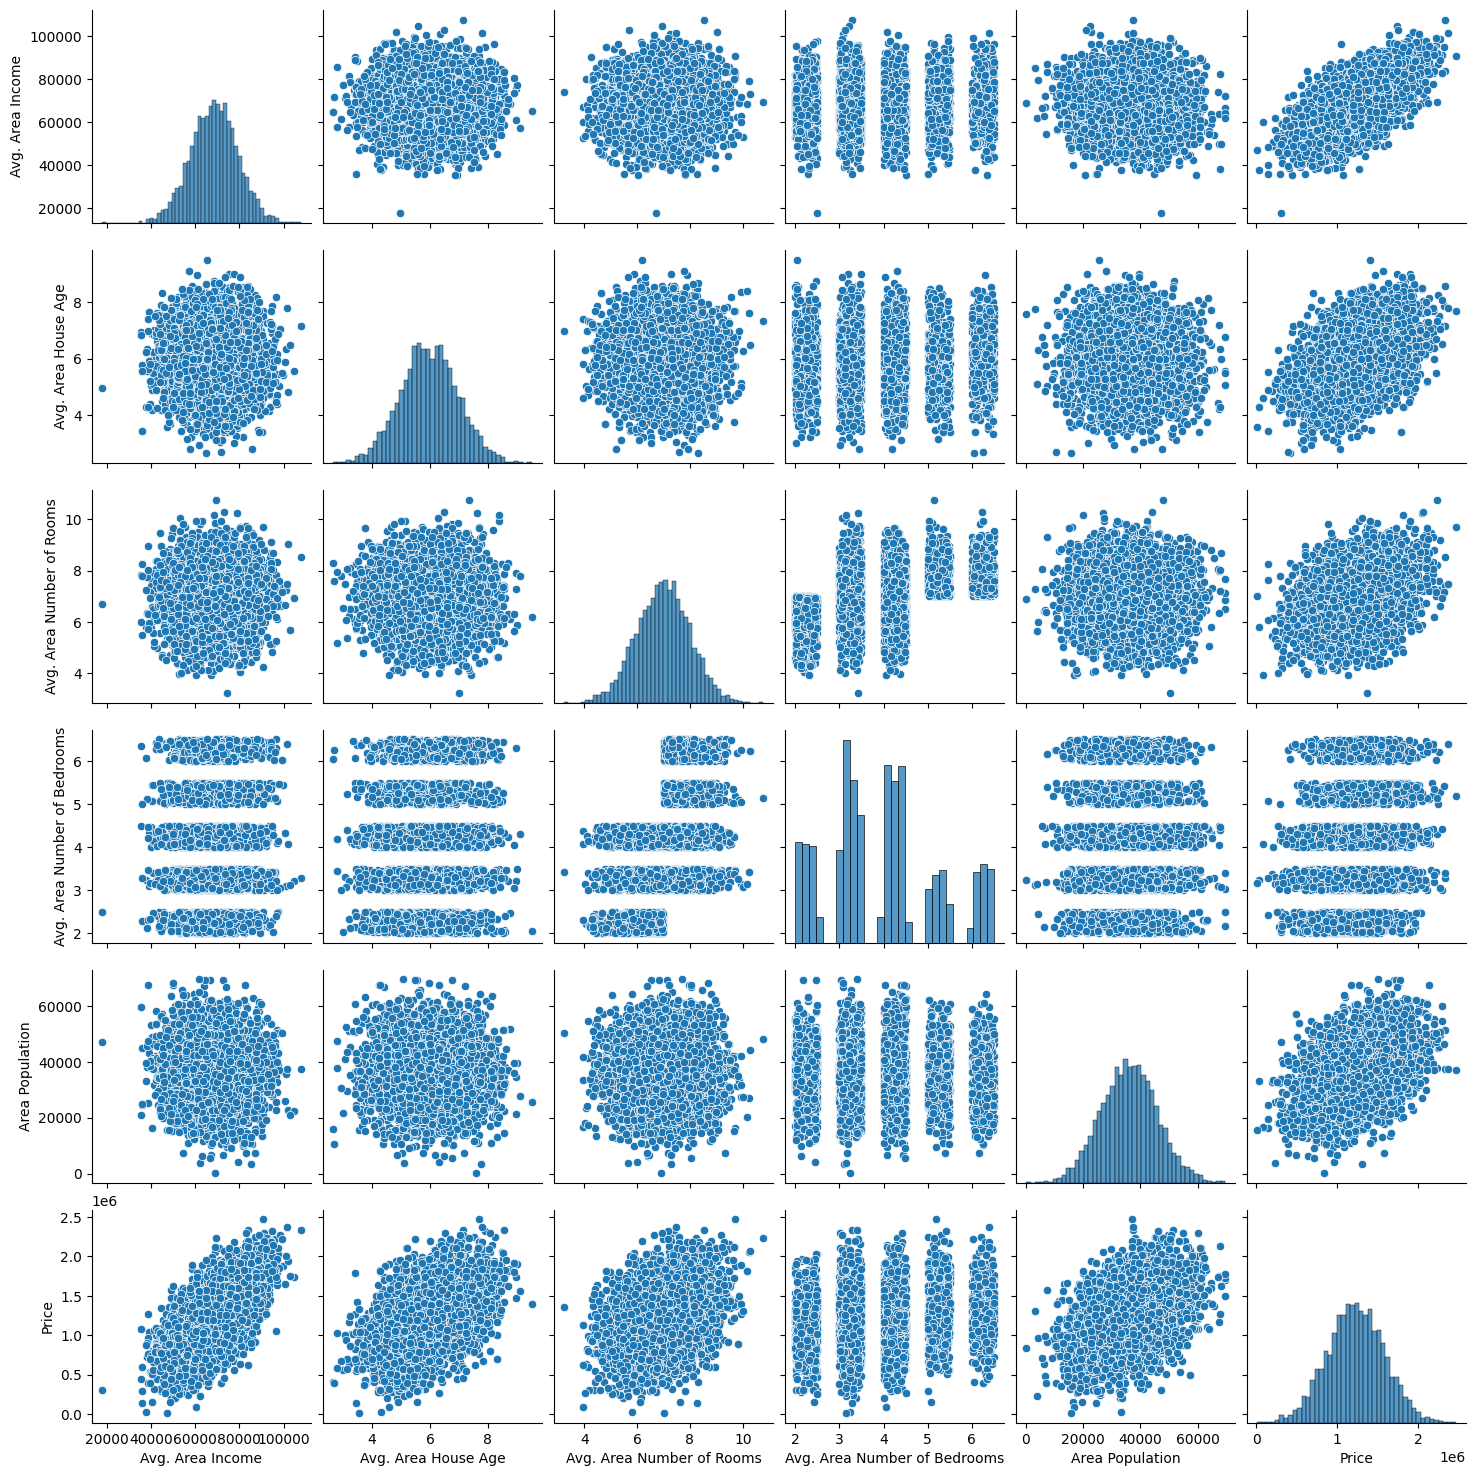

In [20]:
# Quick data overview in a pairplot
sns.pairplot(housing)

##### Train/Test split

Do not need to do this everytime, but this notebook will to ensure it is fresh at each section

In [21]:
from sklearn.model_selection import train_test_split

# Assign features and classes to x, y values
# x: features (Independent Variables)
# y: target classes (Dependent Variables)
x = housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = housing['Price']



In [22]:
print(x.shape)
print(y.shape)

(5000, 5)
(5000,)


In [23]:
# Split the data into training and test sets
# test_size: 30% of the total data (test_size=0.3)
# random_state: Ensures reproducibility of the splits
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,
                                                    random_state=101)

In [24]:
# Create an instance of the Linear Regression object
model = LinearRegression()

In [25]:
# Use scikit-learns fit method to train this model on our training data
model.fit(x_train, y_train)

LinearRegression()

In [26]:
# Examining each of the models coefficients
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

# Holding all other features fixed
# 1 unit increase in Avg. Area Income is associated with an increase of $21.52
# 1 unit increase in Avg. Area House Age is associated with an increase of $164883.28
# 1 unit increase in Avg. Area Number of Rooms is associated with an increase of $122368.68
# 1 unit increase in Avg. Area Number of Bedrooms is associated with an increase of $2233.80
# 1 unit increase in Area Population is associated with an increase of $15.15

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678023
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


##### Making predictions from the model

```
model.predict() - accepts an x-array parameter. It will generate the y values
```

In [27]:
predictions = model.predict(x_test)

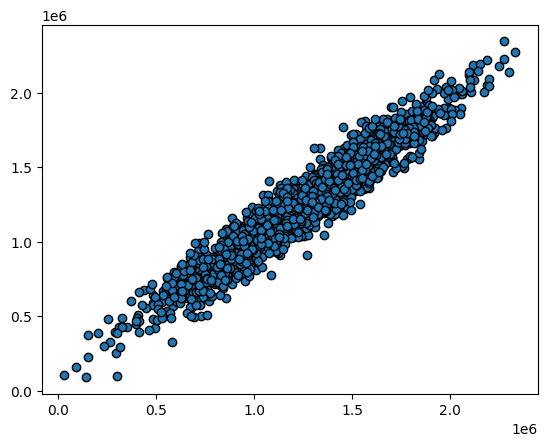

In [28]:
plt.scatter(y_test, predictions, edgecolor='black')

# A perfectly straight diagonal line in this scatterplot would indicate that our model perfectly predicted the y-array values

<Axes: xlabel='Price', ylabel='Count'>

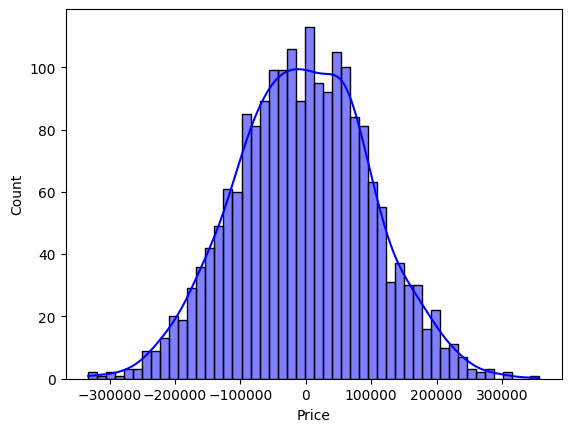

In [29]:
sns.histplot((y_test - predictions), bins = 50, kde=True, color='Blue', edgecolor="black", linewidth=1)

##### Calculating the Mean Absolute Error, Mean Squared Error and the Root Mean Squared Error

Calculating the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

MAE is the easiest to understand, because it's the average error

MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world

RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units

All of these are loss functions, because we want to minimise them

In [30]:
from sklearn import metrics

In [31]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 82288.2225072179
MSE: 10460958905.774702
RMSE: 102278.82921589738


# 3. Logistic Regression

In [32]:
titanic_data = pd.read_csv('titanic.csv')

In [33]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Titanic dataset columns

```
PassengerId: a numerical identifier for every passenger on the Titanic.
Survived: a binary identifier that indicates whether or not the passenger survived the Titanic crash. This variable will hold a value of 1 if they survived and 0 if they did not.
Pclass: the passenger class of the passenger in question. This can hold a value of 1, 2, or 3, depending on where the passenger was located in the ship.
Name: the passenger’s name.`
Sex: male or female.
Age: the age (in years) of the passenger.
SibSp: the number of siblings and spouses aboard the ship.
Parch: the number of parents and children aboard the ship.
Ticket: the passenger’s ticket number.
Fare: how much the passenger paid for their ticket on the Titanic.
Cabin: the passenger’s cabin number.
Embarked: the port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
```

##### Required EDA for data

In [34]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<Axes: >

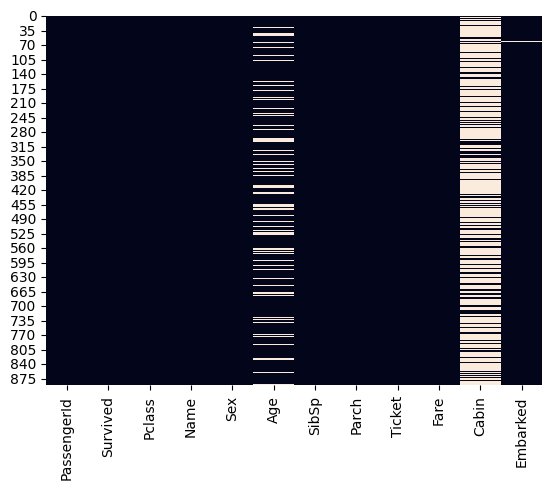

In [35]:
# Check for null values
sns.heatmap(titanic_data.isnull(), cbar=False)

# Output:
# White lines signify missing data
# Age and Cabin have missing data

##### Imputation

```
Will use the PClass to calculate Age missing values
```

<Axes: xlabel='Pclass', ylabel='Age'>

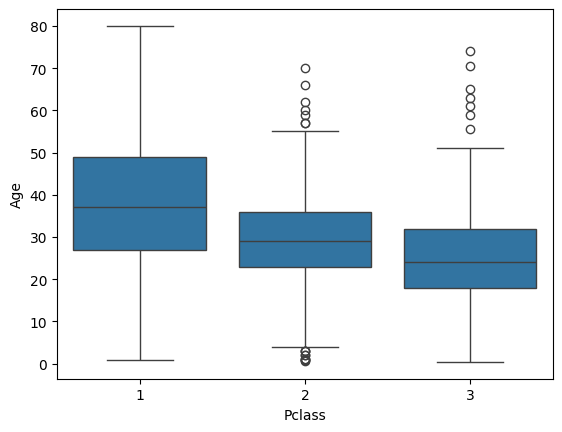

In [36]:
# Dataset shows older passengers tend to be in higher class cabin
sns.boxplot(x='Pclass', y='Age', data=titanic_data)

In [37]:
# Determine the mean Age value for each Pclass value

#Pclass value 1
titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

#Pclass value 2
titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

#Pclass 3
titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [38]:
# Define imputation function
def impute_missing_age(columns):

    age = columns.iloc[0]
    passenger_class = columns.iloc[1]

    

    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()

    else:
        return age

In [41]:
# apply it to every row in the titanic_data DataFrame
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

<Axes: >

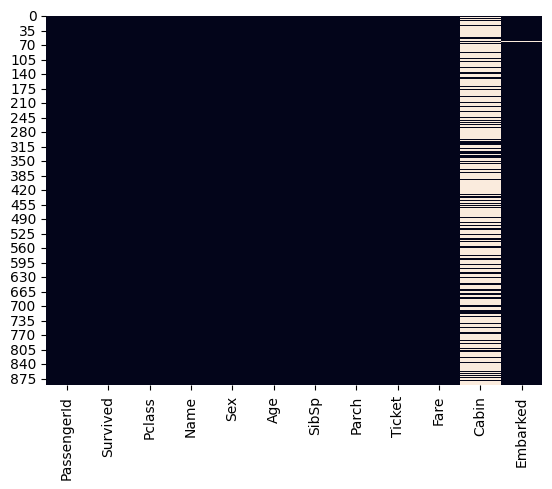

In [42]:
# Check for null values
sns.heatmap(titanic_data.isnull(), cbar=False)

In [43]:
# Drop any columns with missing data
titanic_data.dropna(inplace = True)

In [44]:
# Remove unneeded columns to determine Titanic survival rates
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [45]:
# View remaining columns
print(titanic_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin'],
      dtype='object')


In [46]:
# Convert non-numeric values to a numeric value
titanic_data = pd.get_dummies(titanic_data)

##### Train/Test split

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data we will be using to make predictions
x_data = titanic_data.drop('Survived', axis = 1)

# Data we are attempting to predict
y_data = titanic_data['Survived']

In [48]:
# split 70/30
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)


In [49]:
# Create model
model = LogisticRegression(max_iter=1000)


In [50]:
# Train Model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
# Make predictions
predictions = model.predict(x_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      0.30      0.46        20
           1       0.75      1.00      0.85        41

    accuracy                           0.77        61
   macro avg       0.87      0.65      0.66        61
weighted avg       0.83      0.77      0.73        61



In [53]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# Fit the logistic regression model
model = LogisticRegression()
model.fit(x_train, x_train)

# Create a mesh grid for our plot
h = .02  # step size in the mesh
x_min, x_max = x_train.min() - .5, x_train.max() + .5
y_min, y_max = y_train.min() - .5, y_train.max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the model to make predictions on each point in the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Reshape the predictions to have the same shape as our xx and yy mesh grid
Z = Z.reshape(xx.shape)

# Plot the decision boundary on the mesh grid
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


ValueError: y should be a 1d array, got an array of shape (141, 152) instead.

# 4. K-Nearest Neighbours

Using the results of the EDA, let's utilise 'petal width' and 'petal length'.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Load the Iris dataset from sklearn datasets
iris = datasets.load_iris()

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(iris.data, iris.target)

KNeighborsClassifier()

## Measuring Model Performance

Using the KNN model

##### Train/Test split


In [ ]:
from sklearn.model_selection import train_test_split

# Assign features and classes to x, y values
# x: features (Independent Variables)
# y: target classes (Dependent Variables)
x = iris['data']
y = iris.target

# Split the data into training and test sets
# test_size: 30% of the total data (test_size=0.3)
# random_state: Ensures reproducibility of the splits
# stratify: Ensures that the distribution of classes,
#           in the train and test splits is similar to the original dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
                                                    random_state=42, stratify=y)

In [ ]:
# Create a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier()

# Train the KNN classifier using the training data
knn.fit(x_train, y_train)

# Use the trained KNN classifier to make predictions on the test data
y_pred = knn.predict(x_test)

print(f"Test set predictions: {y_pred}")

Test set predictions: [2 1 2 1 2 2 1 1 0 2 0 0 2 2 0 2 1 0 0 0 1 0 1 2 2 1 1 1 1 0 2 2 1 0 2 0 0
 0 0 1 1 0 1 2 1]


##### Compute the accuracy of the K-Nearest Neighbours (KNN) model on this dataset

```
x_test: This is the test data which the model has not seen during training.
        The model uses this data to make predictions.

y_test: These are the true labels for the test data.

knn.score(x_test, y_test): Model makes predictions on x_test and compares these predictions with true labels y_test.
The score is the percentage of correct predictions out of total predictions.
```

In [ ]:
# Compute and return the accuracy of the KNN model on the test data
knn.score(x_test, y_test)

0.9777777777777777

##### Plot test accuracy and train accuracy vs k-value

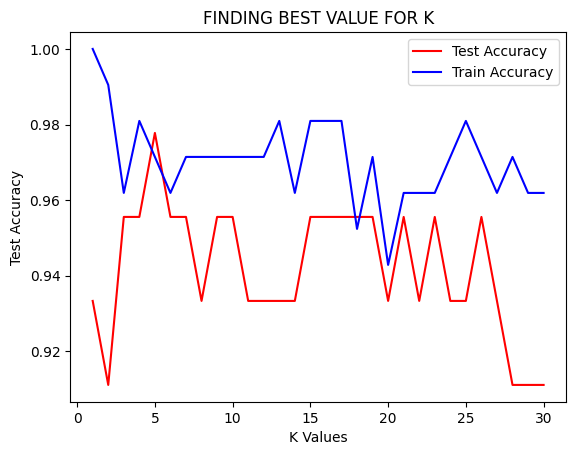

In [ ]:
# Initialise a list of K values from 1 to 30
p = list(range(1, 31))

# Initialize empty lists to store accuracy scores for each K value
lst_test =[]
lst_train =[]

# Loop over each K value
for i in p:
    # Create a KNN classifier with the current K value
    knn = KNeighborsClassifier(n_neighbors = i)

    # Train the classifier using the training data
    knn.fit(x_train, y_train)

    # Compute the accuracy of the classifier on the test data and store it in lst_test
    z = knn.score(x_test, y_test)
    t = knn.score(x_train, y_train)

    # Compute the accuracy of the classifier on the training data and store it in lst_train
    lst_test.append(z)
    lst_train.append(t)

# Create a DataFrame from the lists of K values and accuracy scores
# Needed to avoid a melt to match seaborn preferred data format
# Original dataframeis wide format, seaborn prefers long format
data = pd.DataFrame({
    'K Values': p,
    'Test Accuracy': lst_test,
    'Train Accuracy': lst_train
})

# Use Seaborn to create the plot for Test Accuracy
sns.lineplot(x='K Values', y='Test Accuracy', data=data, label='Test Accuracy', color='red')

# Use Seaborn to create the plot for Train Accuracy
sns.lineplot(x='K Values', y='Train Accuracy', data=data, label='Train Accuracy', color='blue')

# Add a title to the plot
plt.title('FINDING BEST VALUE FOR K')
# Add a legend to the plot
plt.legend()


In [ ]:
# Create a confusion matrix using the true labels and predicted labels
# to describe the performance of the model
cm = confusion_matrix(y_test, y_pred)

# Output:
# The diagonal elements represent the number of points for which the predicted label is equal to the true
#    15 instances where the first class was correctly predicted
#    15 instances where the second class was correctly predicted
#    14 instances where the third class was correctly predicted
#
# Off-diagonal elements are those that are mislabeled by the classifier
#    The higher these values are, the worse the performance of your classifier
#    One instance where the classifier predicted the third class but the true label was the second class
#
# Classifier seems to be performing well
# Most of your predictions fall on the diagonal (correct predictions), and there’s only one misclassification


##### Visualise Confusion Matrix

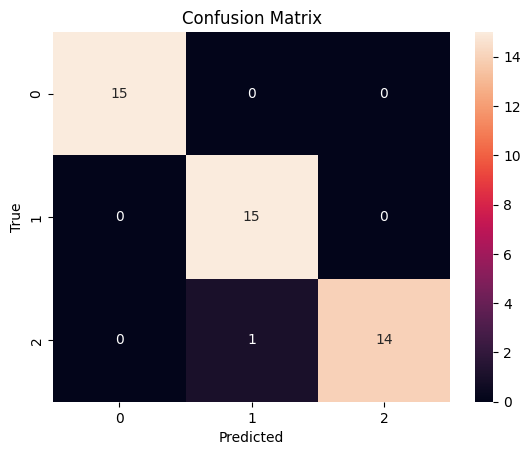

In [ ]:
# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')

# Add labels to the plot
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

# Output:
# The diagonal elements represent the number of points for which the predicted label is equal to the true
#    15 instances where the first class was correctly predicted
#    15 instances where the second class was correctly predicted
#    14 instances where the third class was correctly predicted
#
# Off-diagonal elements are those that are mislabeled by the classifier
#    The higher these values are, the worse the performance of your classifier
#    One instance where the classifier predicted the third class but the true label was the second class
#
# Classifier seems to be performing well
# Most of your predictions fall on the diagonal (correct predictions), and there’s only one misclassification

In [ ]:
# Print a classification report
# includes metrics:
#   precision, recall, f1-score, and support for each class
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



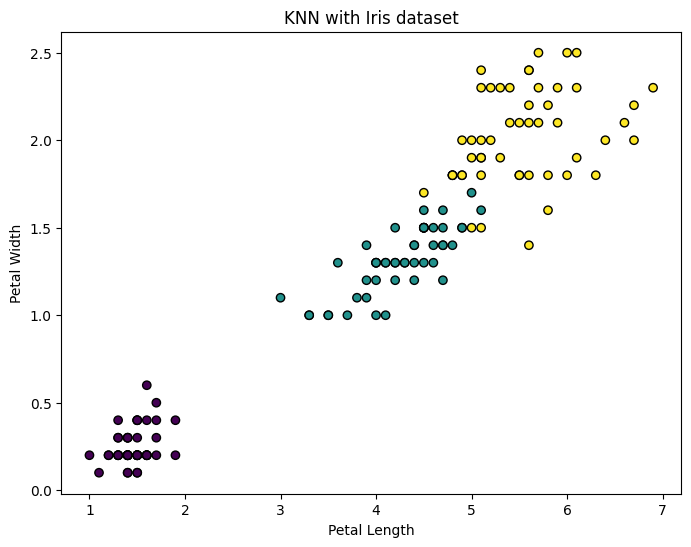

In [ ]:
data = iris.data
target = iris.target

# Fit a KNN model to your data
knn = KNeighborsClassifier(n_neighbors=3)  # Or any other number of neighbors you want
knn.fit(data[:, 2:4], target)

# Create the scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 2], data[:, 3], c=target, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN with Iris dataset')

# Display the plot
plt.show()

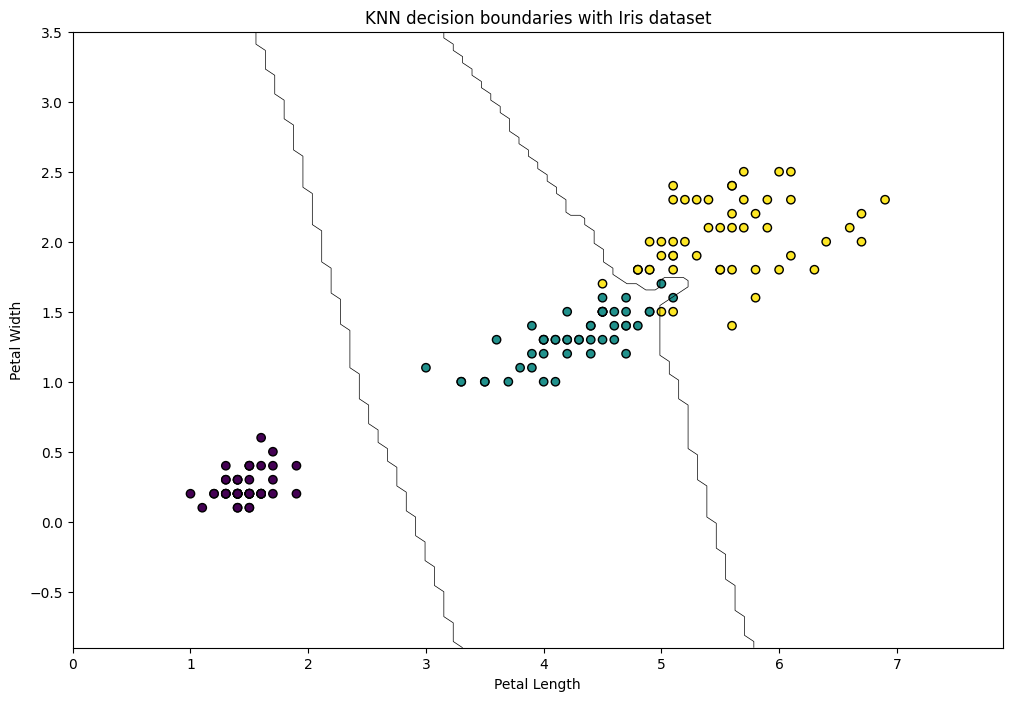

In [ ]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

# Load the iris dataset
iris = load_iris()
data = iris.data
target = iris.target

# Fit a KNN model to your data
knn = KNeighborsClassifier(n_neighbors=3)  # Or any other number of neighbors you want
knn.fit(data[:, 2:4], target)

# Create a grid of points
x = np.linspace(data[:, 2].min()-1, data[:, 2].max()+1, 100)
y = np.linspace(data[:, 3].min()-1, data[:, 3].max()+1, 100)
xx, yy = np.meshgrid(x, y)

# Use the KNN model to make predictions for each point on the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create the scatterplot
plt.figure(figsize=(12, 8))
plt.contour(xx, yy, Z, colors='k', linewidths=0.5, 
            levels=np.arange(target.min(), target.max() + 2) - 0.5)  # Draw decision boundaries as single lines
plt.scatter(data[:, 2], data[:, 3], c=target, edgecolor='k')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('KNN decision boundaries with Iris dataset')

# Display the plot
plt.show()

# 5. Centering and Scaling Data

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv('redwine.csv', sep=';')
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [74]:
# Assign the DataFrame to X
x = df

# Scale the features in X to have zero mean and unit variance
x_scaled = scale(x)

# Print the mean and standard deviation of the features before scaling
print(f"Prescaled mean: \n{np.mean(x)},\nstd:\n{np.std(x)}\n")

# Print the mean and standard deviation of the features after scaling
print(f"Post scaled mean: \n{np.mean(x_scaled)},\nstd:\n{np.std(x_scaled)}")

Prescaled mean: 
7.926036165311652,
std:
fixed acidity            1.740552
volatile acidity         0.179004
citric acid              0.194740
residual sugar           1.409487
chlorides                0.047051
free sulfur dioxide     10.456886
total sulfur dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
quality                  0.807317
dtype: float64

Post scaled mean: 
-2.5269666608437166e-15,
std:
1.0


c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [77]:
# Define the steps of the pipeline to first scale the data and then apply KNN
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]

# Create a pipeline with the defined steps
pipeline = Pipeline(steps)

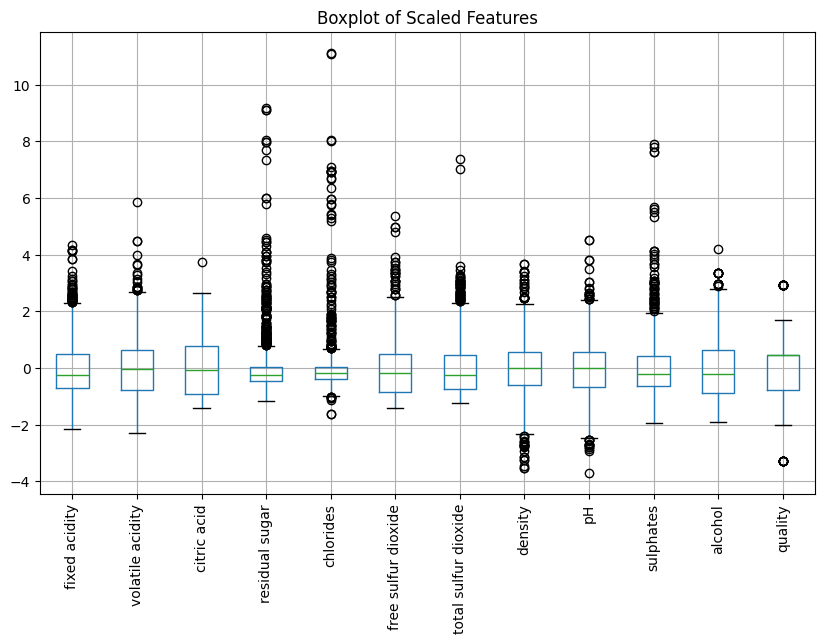

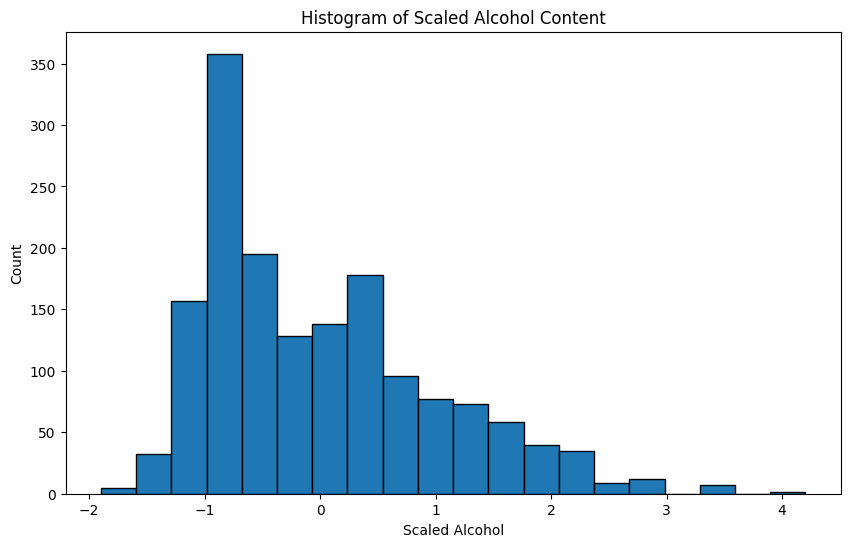

In [78]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Convert the scaled data to a DataFrame
df_scaled = pd.DataFrame(x_scaled, columns=df.columns)

# Create a boxplot of the scaled features
plt.figure(figsize=(10, 6))
df_scaled.boxplot(rot=90)
plt.title('Boxplot of Scaled Features')
plt.show()

# Create a histogram of the scaled 'alcohol' feature
plt.figure(figsize=(10, 6))
plt.hist(df_scaled['alcohol'], bins=20, edgecolor='black')
plt.xlabel('Scaled Alcohol')
plt.ylabel('Count')
plt.title('Histogram of Scaled Alcohol Content')
plt.show()


# Decision Trees

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [60]:
# Function importing Dataset
def importdata():
	balance_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data',
	                            sep= ',', header = None)
	
	# Printing the dataswet shape
	print ("Dataset Length: ", len(balance_data))
	print ("Dataset Shape: ", balance_data.shape)
	
	# Printing the dataset obseravtions
	print ("Dataset: ",balance_data.head())
	return balance_data

# Function to split the dataset
def splitdataset(balance_data):

	# Separating the target variable
	X = balance_data.values[:, 1:5]
	Y = balance_data.values[:, 0]

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini
	
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
			criterion = "entropy", random_state = 100,
			max_depth = 3, min_samples_leaf = 5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred, zero_division=1))

In [61]:
data = importdata()
X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
clf_gini = train_using_gini(X_train, X_test, y_train)
clf_entropy = tarin_using_entropy(X_train, X_test, y_train)

# Operational Phase
print("Results Using Gini Index:")

# Prediction using gini
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

print("Results Using Entropy:")
# Prediction using entropy
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Dataset Length:  625
Dataset Shape:  (625, 5)
Dataset:     0  1  2  3  4
0  B  1  1  1  1
1  R  1  1  1  2
2  R  1  1  1  3
3  R  1  1  1  4
4  R  1  1  1  5
Results Using Gini Index:
Predicted values:
['R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'L'
 'L' 'R' 'L' 'R' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L' 'R' 'L' 'L' 'L'
 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'R' 'L' 'R'
 'R' 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R' 'L' 'R' 'L'
 'R' 'R' 'L' 'L' 'L' 'R' 'R' 'L' 'L' 'L' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'L' 'R' 'L' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L'
 'L' 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R'
 'L' 'L' 'R' 'L' 'L' 'R' 'L' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'R' 'R'
 'L' 'L' 'R' 'R' 'R' 'R' 'L' 'R' 'R' 'R' 'L' 'R' 'L' 'L' 'L' 'L' 'R' 'R'
 'L' 'R' 'R' 'L' 'L' 'R' 'R' 'R']
Confusion Matrix:  [[ 0  6  7]
 [ 

# Unsupervised Learning

# 1. K-means Clustering

In [83]:
from sklearn.cluster import KMeans

In [84]:
# Perform steps regarding the iris dataset
# More information is in earlier steps
iris = datasets.load_iris()
print(iris.keys())
print(iris.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['setosa' 'versicolor' 'virginica']


In [85]:
# Initialise the KMeans model with 3 clusters
model = KMeans(n_clusters=3)

In [86]:
# Fit the model to the iris dataset
model.fit(iris['data'])

c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [87]:
# Predict the cluster labels for the iris dataset
y_labels = model.predict(iris['data'])

In [88]:
# Print the predicted cluster labels
print(y_labels)

# Print the actual labels from the iris dataset
print(iris['target'])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [89]:
# Select the first feature (sepal length) for X-axis
x = iris['data'][:,0]
# Select the fourth feature (petal width) for Y-axis
y = iris['data'][:,3]

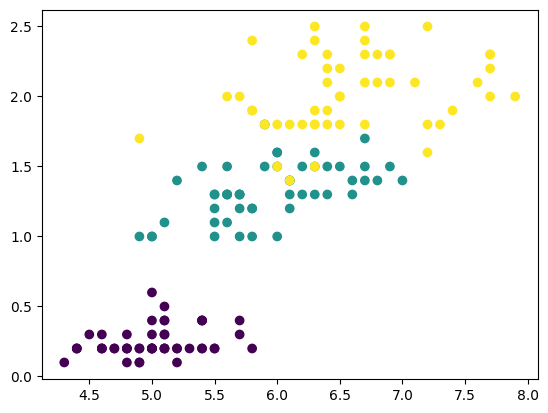

In [91]:
# Create a scatter plot with different colors for each target class
plt.scatter(x, y, c=iris['target'])

# Display the plot
plt.show()

##### Visualise steps of k-means at each iteration

This is example code. A more complex dataset will be needed to see a more delayed convergence

c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


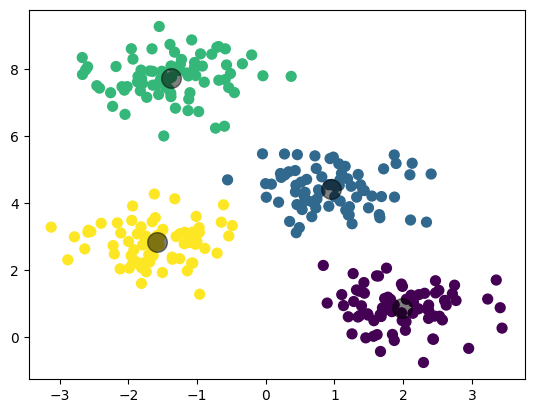

c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


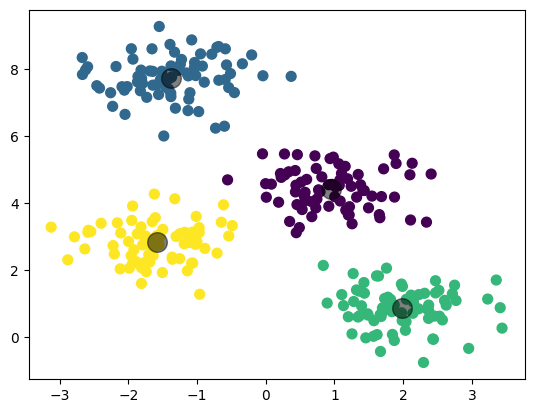

c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


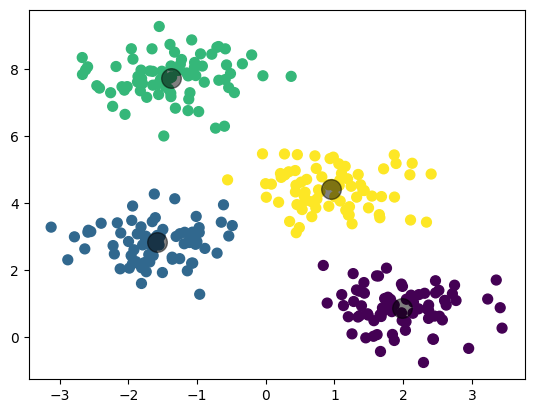

In [93]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create a sample dataset with 300 data points and 4 clusters
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=4)

# Fit the model to the data and predict the cluster labels
y_kmeans = kmeans.fit_predict(X)

# Plot the data points and centroids for each iteration
for i in range(3):  # Number of iterations
    # Update the cluster centers and predict the cluster labels
    y_kmeans = kmeans.fit_predict(X)

    # Plot the data points
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

    # Plot the centroids
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    # Show the plot for this iteration
    plt.show()

##### Evaluating Clusters

c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


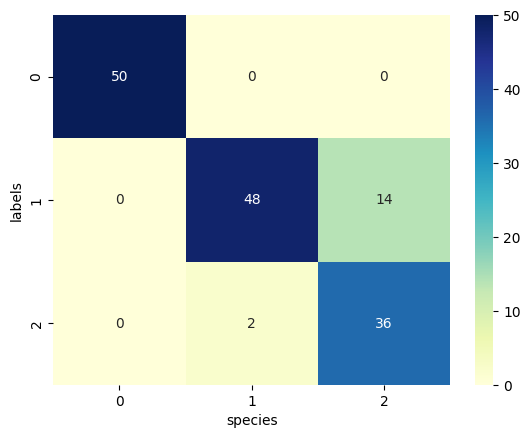

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load the iris dataset
iris = load_iris()

# Fit the KMeans model to the iris data
kmeans = KMeans(n_clusters=3)
kmeans.fit(iris.data)

# Create a DataFrame with the cluster labels and true labels
df = pd.DataFrame({'labels': kmeans.labels_, 'species': iris.target})

# Create a cross-tabulation
ct = pd.crosstab(df['labels'], df['species'])

# Plot the cross-tabulation
sns.heatmap(ct, annot=True, cmap='YlGnBu')
plt.show()


##### Measuring Cluster Quality

c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\mtrj1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

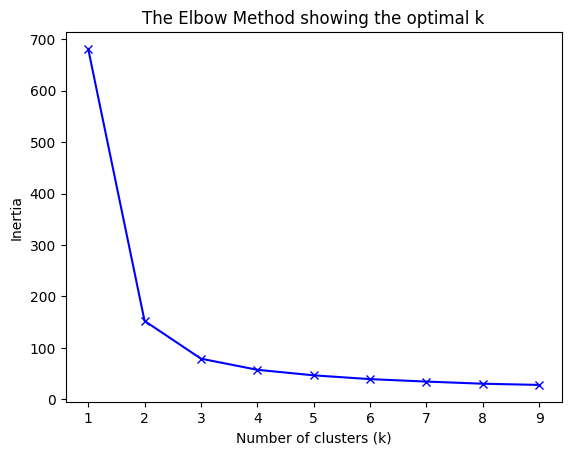

In [96]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

# Load the iris dataset
iris = load_iris()

# List to hold the inertias
inertias = []

# Range of cluster numbers to try
K = range(1, 10)

# Calculate inertia for each number of clusters
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(iris.data)
    inertias.append(kmeans.inertia_)

# Plot the elbow graph
plt.plot(K, inertias, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()
